In [1]:
# import the libraries load the trajectory

import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

# load the trajectory and check its basic info
traj=md.load('step5_all_noSol.xtc',top='step5_noSol.gro')
print(traj)
print(traj.time[-1]/1000,"ns")
print(traj.n_frames)
print(traj.topology)

<mdtraj.Trajectory with 1001 frames, 284 atoms, 20 residues, and unitcells>
100.0 ns
1001
<mdtraj.Topology with 1 chains, 20 residues, 284 atoms, 265 bonds>


In [2]:
# compute the distance between the first and last atom of each frame
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)
print(dist)
# the simulation time (in picoseconds)
print(traj.time)

[1.504028  1.0410736 1.2575175 ... 1.193639  1.0000786 1.3023615]
[     0.    100.    200. ...  99800.  99900. 100000.]


In [3]:
# Compute the radius of gyration for every frame.
Rgndarray = md.compute_rg(traj, masses=None)
Rgndarray

array([0.72784975, 0.72541067, 0.71537521, ..., 0.74494832, 0.73482198,
       0.72713646])

Plot saved: ../Figures/2JOF_End2EndDistance_RadiusofGyration.pdf


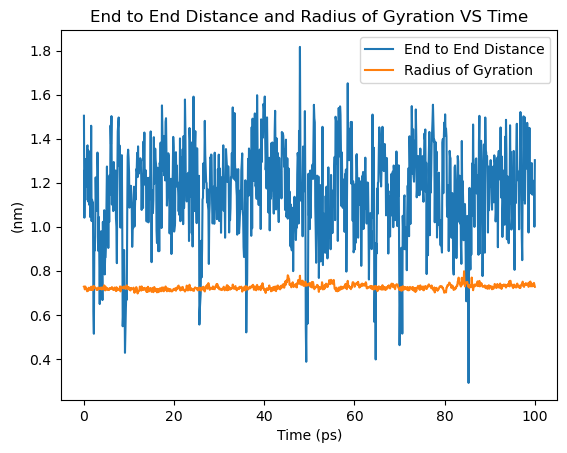

In [4]:
plt.plot(traj.time/1000, dist, label= "End to End Distance")           #plot distance vs time
plt.plot(traj.time/1000, Rgndarray, label= "Radius of Gyration")       #plot radius of gyration vs time
plt.legend()                     
plt.xlabel('Time (ps)')
plt.ylabel('(nm)')
plt.title('End to End Distance and Radius of Gyration VS Time')
plt.savefig("../Figures/2JOF_End2EndDistance_RadiusofGyration.pdf",format="pdf")
print("Plot saved: ../Figures/2JOF_End2EndDistance_RadiusofGyration.pdf")
plt.show()

Plot saved: ../Figures/2JOF_End2EndDistance.pdf


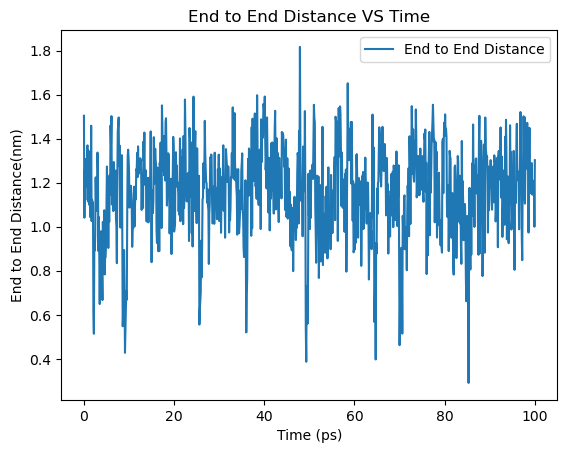

In [5]:
plt.plot(traj.time/1000, dist, label= "End to End Distance")           #plot distance vs time
plt.legend()                     
plt.xlabel('Time (ps)')
plt.ylabel('End to End Distance(nm)')
plt.title('End to End Distance VS Time')
plt.savefig("../Figures/2JOF_End2EndDistance.pdf",format="pdf")
print("Plot saved: ../Figures/2JOF_End2EndDistance.pdf")
plt.show()

Plot saved: ../Figures/2JOF_RadiusofGyration.pdf


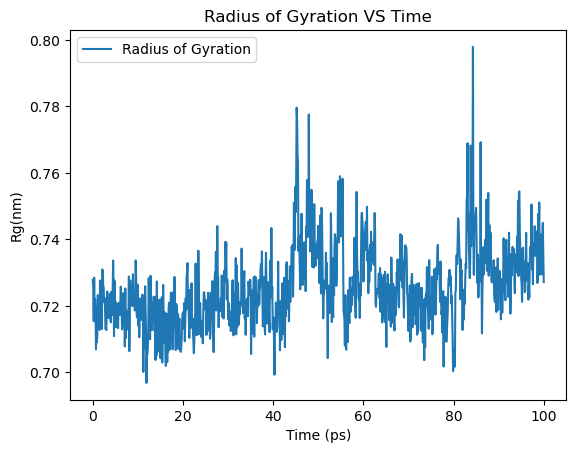

In [6]:
plt.plot(traj.time/1000, Rgndarray, label= "Radius of Gyration")       #plot radius of gyration vs time
plt.legend()                     
plt.xlabel('Time (ps)')
plt.ylabel('Rg(nm)')
plt.title('Radius of Gyration VS Time')
plt.savefig("../Figures/2JOF_RadiusofGyration.pdf",format="pdf")
print("Plot saved: ../Figures/2JOF_RadiusofGyration.pdf")
plt.show()